## Results bar chart

Gather all results to produce the bar chart used to display results

In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%cd -q ../test/
# do this before importing pylab or pyplot
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

%matplotlib inline
#%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format='svg'


In [2]:
import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

from SparseEdges import EdgeFactory
ef = EdgeFactory('../notebooks/srep_param.py')
ef.pe.figpath = '../figures'

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
Methods = ('FO', 'CM', 'SO')

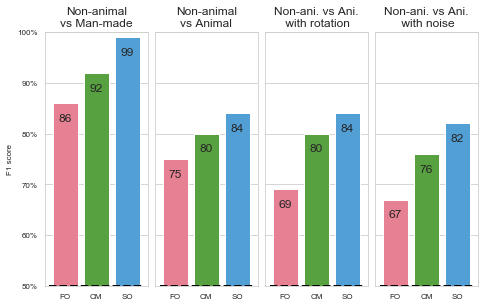

In [5]:
results = [
{'name': 'Non-animal\nvs Man-made', 'mean':[np.load('cache_dir/srep_SVM_serre07_distractors_laboratory_first.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_serre07_distractors_laboratory_first_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_serre07_distractors_laboratory_first_full.npy').mean()*100.]},
{'name': 'Non-animal\nvs Animal', 'mean':[np.load('cache_dir/srep_SVM_serre07_distractors_serre07_targets_first.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_serre07_distractors_serre07_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_serre07_distractors_serre07_targets_first_full.npy').mean()*100.]},
{'name': 'Non-ani. vs Ani.\n with rotation', 'mean':[np.load('cache_dir/srep_SVM_serre07_distractors_serre07_targets_first_rot.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_serre07_distractors_serre07_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_serre07_distractors_serre07_targets_first_full.npy').mean()*100.]},
{'name': 'Non-ani. vs Ani.\n with noise', 'mean':[np.load('cache_dir/srep_noise_SVM_serre07_distractors_serre07_targets_first_rot.npy').mean()*100.,
                                            np.load('cache_dir/srep_noise_SVM_serre07_distractors_serre07_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_noise_SVM_serre07_distractors_serre07_targets_full.npy').mean()*100.]}, 
]
Methods = ('FO', 'CM', 'SO')
results = [
{'name': 'Non-animal\nvs Man-made', 'mean':[86., 92., 99]},
{'name': 'Non-animal\nvs Animal', 'mean':[75., 80., 84]},
{'name': 'Non-ani. vs Ani.\n with rotation', 'mean':[69., 80., 84]},
{'name': 'Non-ani. vs Ani.\n with noise', 'mean':[67., 76., 82]}, 
]

N_datasets = len(results)
#sns.set_style("ticks")
#sns.set(style="white")#, context="talk")
sns.set_style("whitegrid")

fig_width_pt = 1.5*318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

fig, axs = plt.subplots(1, N_datasets, figsize=(fig_width, fig_width/1.618), sharey=True)
ind = np.arange(len(Methods))                # the x locations for the groups
ind_order = ind #[0, 2, 1]
for i_dataset, dataset in enumerate(results):
    axs[i_dataset] = sns.barplot(np.array(Methods), np.array(dataset['mean']), #dataset['data'], #
                palette=sns.color_palette("husl", 3), #hline=50, 
                ax=axs[i_dataset], order=('FO', 'CM', 'SO'))
    axs[i_dataset].plot([-.5, len(Methods)-.5], [50, 50], 'k--', linewidth=2)
    for pos, value in zip(ind_order, dataset['mean']):
        axs[i_dataset].annotate('%0.0f' % value, xy=(pos, value-2),  #xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top', fontsize=12)
    axs[i_dataset].set_title(dataset['name'], horizontalalignment='center')
    axs[i_dataset].set_ylim([50, 100])

#sns.despine(bottom=True)
#sns.despine(left=True)
plt.setp(axs[0], ylabel='F1 score')
_ = plt.setp(fig.axes, yticks=np.linspace(50, 100, 6), yticklabels=[ ( '%d%%'% k ) for k in np.linspace(50, 100, 6)])

#xticklabels = axs[i_dataset].get_xticklabels()
#print xticklabels[0]
#xticklabels[0].set_color('red')
#print xticklabels[0]
#axs[i_dataset].set_xticklabels(xticklabels)
#plt.setp(fig.axes, xticklabels=xticklabels)

plt.tight_layout(pad=.1, w_pad=.03)
plt.show()

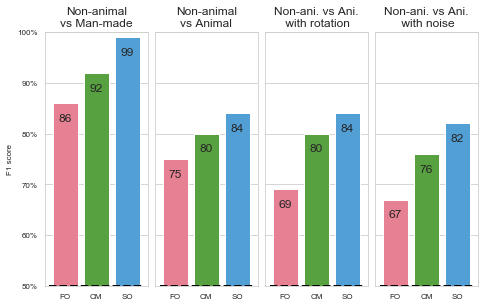

In [6]:
ef.savefig(fig, 'figure_results', figpath=None)

## With sub-categories

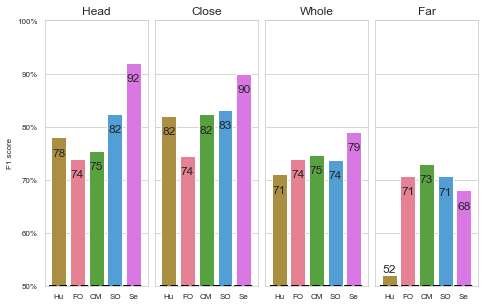

In [7]:
Methods = ('Hu', 'Se', 'FO', 'CM', 'SO')
results = [
{'name': 'Head', 'mean':[78, 92, 73.9, 75.4, 82.4]},
{'name': 'Close', 'mean':[82, 90, 74.5, 82.3, 83.1]},
{'name': 'Whole', 'mean':[71, 79, 73.9, 74.7, 73.7]},
{'name': 'Far', 'mean':[52, 68, 70.7, 73.0, 70.6]}, 
]


palette_ = sns.color_palette("husl", 6)
palette = [palette_[1]] # mustard for humans
[palette.append(col) for col in sns.color_palette("husl", 3)] # human in red
palette.append(palette_[-1]) # pinkish for serre 

N_datasets = len(results)
#sns.set_style("ticks")
#sns.set(style="white")#, context="talk")
sns.set_style("whitegrid")

fig_width_pt = 1.5*318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

fig, axs = plt.subplots(1, N_datasets, figsize=(fig_width, fig_width/1.618), sharey=True)
ind = np.arange(len(Methods))                # the x locations for the groups
ind_order = [0, 4, 1, 2, 3] #[2, 3, 4, 0, 1]
for i_dataset, dataset in enumerate(results):
    axs[i_dataset] = sns.barplot(np.array(Methods), np.array(dataset['mean']), #dataset['data'], #
                palette=palette, #hline=50, 
                ax=axs[i_dataset], order=('Hu', 'FO', 'CM', 'SO', 'Se'))
    axs[i_dataset].plot([-.5, len(Methods)-.5], [50, 50], 'k--', linewidth=2)

    for pos, value in zip(ind_order, dataset['mean']):
        up = np.sign((value>55.) *1. - .5)
        axs[i_dataset].annotate('%0.0f' % value, xy=(pos, value-2*up),  #xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top', fontsize=12)
    axs[i_dataset].set_title(dataset['name'], horizontalalignment='center')
    axs[i_dataset].set_ylim([50, 100])

plt.setp(axs[0], ylabel='F1 score')
_ = plt.setp(fig.axes, yticks=np.linspace(50, 100, 6), yticklabels=[ ( '%d%%'% k ) for k in np.linspace(50, 100, 6)])

plt.tight_layout(pad=.1, w_pad=.03)
plt.show()

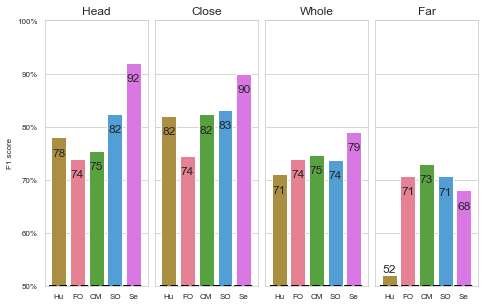

In [8]:
ef.savefig(fig, 'figure_SM_subsets_results', figpath=None)


## More databases

In [9]:
!ls mat/srep*SVM_holle*full*npy

ls: mat/srep*SVM_holle*full*npy: No such file or directory


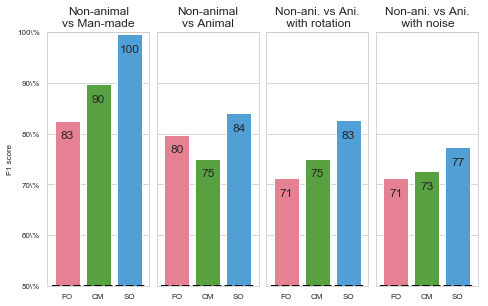

In [10]:
Methods = ('FO', 'CM', 'SO')
results = [
{'name': 'Non-animal\nvs Man-made', 'mean':[np.load('cache_dir/srep_SVM_holle_distractors_laboratory_first.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_holle_distractors_laboratory_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_holle_distractors_laboratory_first_full.npy').mean()*100.]},
{'name': 'Non-animal\nvs Animal', 'mean':[np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_first.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_first_full.npy').mean()*100.]},
{'name': 'Non-ani. vs Ani.\n with rotation', 'mean':[np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_first_rot.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_full.npy').mean()*100.]},
{'name': 'Non-ani. vs Ani.\n with noise', 'mean':[np.load('cache_dir/srep_noise_SVM_holle_distractors_holle_targets_first_rot.npy').mean()*100.,
                                            np.load('cache_dir/srep_noise_SVM_holle_distractors_holle_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_noise_SVM_holle_distractors_holle_targets_full.npy').mean()*100.]},
]

N_datasets = len(results)
#sns.set_style("ticks")
#sns.set(style="white")#, context="talk")
sns.set_style("whitegrid")

fig_width_pt = 1.5*318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

fig, axs = plt.subplots(1, N_datasets, figsize=(fig_width, fig_width/1.618), sharey=True)
ind = np.arange(len(Methods))                # the x locations for the groups
ind_order = ind #[0, 2, 1]
for i_dataset, dataset in enumerate(results):
    axs[i_dataset] = sns.barplot(np.array(Methods), np.array(dataset['mean']), #dataset['data'], #
                palette=sns.color_palette("husl", 3), #hline=50, 
                ax=axs[i_dataset], order=('FO', 'CM', 'SO'))
    axs[i_dataset].plot([-.5, len(Methods)-.5], [50, 50], 'k--', linewidth=2)

    for pos, value in zip(ind_order, dataset['mean']):
        axs[i_dataset].annotate('%0.0f' % value, xy=(pos, value-2),  #xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top', fontsize=12)
    axs[i_dataset].set_title(dataset['name'], horizontalalignment='center')
    axs[i_dataset].set_ylim([50, 100])

#sns.despine(bottom=True)
#sns.despine(left=True)
plt.setp(axs[0], ylabel='F1 score')
_ = plt.setp(fig.axes, yticks=np.linspace(50, 100, 6), yticklabels=[ ( '%d\%%'% k ) for k in np.linspace(50, 100, 6)])

#xticklabels = axs[i_dataset].get_xticklabels()
#print xticklabels[0]
#xticklabels[0].set_color('red')
#print xticklabels[0]
#axs[i_dataset].set_xticklabels(xticklabels)
#plt.setp(fig.axes, xticklabels=xticklabels)

plt.tight_layout(pad=.1, w_pad=.03)
plt.show()

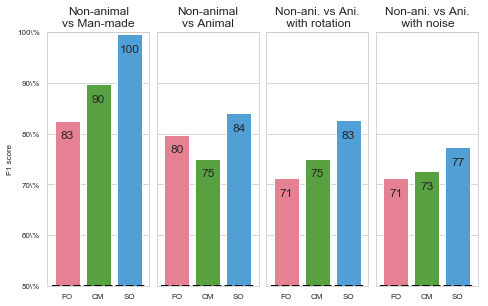

In [11]:
results = [
{'name': 'Non-animal\nvs Man-made', 'mean':[np.load('cache_dir/srep_SVM_holle_distractors_laboratory_first.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_holle_distractors_laboratory_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_holle_distractors_laboratory_first_full.npy').mean()*100.]},
{'name': 'Non-animal\nvs Animal', 'mean':[np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_first.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_first_full.npy').mean()*100.]},
{'name': 'Non-ani. vs Ani.\n with rotation', 'mean':[np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_first_rot.npy').mean()*100.,
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_SVM_holle_distractors_holle_targets_full.npy').mean()*100.]},
{'name': 'Non-ani. vs Ani.\n with noise', 'mean':[np.load('cache_dir/srep_noise_SVM_holle_distractors_holle_targets_first_rot.npy').mean()*100.,
                                            np.load('cache_dir/srep_noise_SVM_holle_distractors_holle_targets_chevron.npy').mean()*100., 
                                            np.load('cache_dir/srep_noise_SVM_holle_distractors_holle_targets_full.npy').mean()*100.]},
]

N_datasets = len(results)
#sns.set_style("ticks")
#sns.set(style="white")#, context="talk")
sns.set_style("whitegrid")

fig_width_pt = 1.5*318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

fig, axs = plt.subplots(1, N_datasets, figsize=(fig_width, fig_width/1.618), sharey=True)
ind = np.arange(len(Methods))                # the x locations for the groups
ind_order = ind #[0, 2, 1]
for i_dataset, dataset in enumerate(results):
    axs[i_dataset] = sns.barplot(np.array(Methods), np.array(dataset['mean']), #dataset['data'], #
                palette=sns.color_palette("husl", 3), #hline=50, 
                ax=axs[i_dataset], order=('FO', 'CM', 'SO'))
    axs[i_dataset].plot([-.5, len(Methods)-.5], [50, 50], 'k--', linewidth=2)

    for pos, value in zip(ind_order, dataset['mean']):
        axs[i_dataset].annotate('%0.0f' % value, xy=(pos, value-2),  #xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top', fontsize=12)
    axs[i_dataset].set_title(dataset['name'], horizontalalignment='center')
    axs[i_dataset].set_ylim([50, 100])

#sns.despine(bottom=True)
#sns.despine(left=True)
plt.setp(axs[0], ylabel='F1 score')
_ = plt.setp(fig.axes, yticks=np.linspace(50, 100, 6), yticklabels=[ ( '%d\%%'% k ) for k in np.linspace(50, 100, 6)])

#xticklabels = axs[i_dataset].get_xticklabels()
#print xticklabels[0]
#xticklabels[0].set_color('red')
#print xticklabels[0]
#axs[i_dataset].set_xticklabels(xticklabels)
#plt.setp(fig.axes, xticklabels=xticklabels)

plt.tight_layout(pad=.1, w_pad=.03)
plt.show()

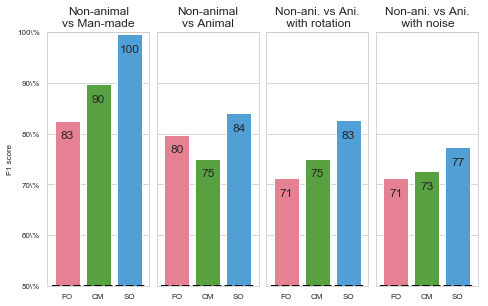

In [12]:
ef.savefig(fig, 'figure_SM_results', figpath=None)


### version control

In [13]:
!git s

 M ../figures/MPtutorial.jpg
 M ../figures/MPtutorial.pdf
 M ../figures/MPtutorial.png
 M ../figures/MPtutorial_rec.jpg
 M ../figures/MPtutorial_rec.pdf
 M ../figures/MPtutorial_rec.png
 M ../figures/diagram.pdf
 M ../figures/figure_SM_results.jpg
 M ../figures/figure_SM_results.pdf
 M ../figures/figure_SM_results.png
 M ../figures/figure_SM_subsets_results.jpg
 M ../figures/figure_SM_subsets_results.pdf
 M ../figures/figure_SM_subsets_results.png
 M ../figures/figure_chevrons_animals.jpg
 M ../figures/figure_chevrons_animals.pdf
 M ../figures/figure_chevrons_animals.png
 M ../figures/figure_chevrons_animals_FR.jpg
 M ../figures/figure_chevrons_animals_FR.pdf
 M ../figures/figure_chevrons_animals_FR.png
 M ../figures/figure_results.jpg
 M ../figures/figure_results.pdf
 M ../figures/figure_results.png
 M "../notebooks/0 notebook_databases.ipynb"
 M "../notebooks/1 notebook_core_sim.ipynb"
 M "../notebooks/2 notebook_figure_model.ipynb"
 M "../notebooks/2 notebook_figure_synthesis.ipynb"

In [14]:
!git add  ../notebooks/4*  ../figures/figure_SM_results* ../figures/figure_SM_subsets_results*

In [15]:
!git commit -m' results figures ' ../notebooks/4*  ../figures/figure_res*  ../figures/figure_SM_results* ../figures/figure_SM_subsets_results*

[master be66606]  results figures
 10 files changed, 609 insertions(+), 597 deletions(-)
 rewrite figures/figure_SM_results.jpg (92%)
 rewrite figures/figure_SM_results.png (97%)
 rewrite figures/figure_SM_subsets_results.jpg (93%)
 rewrite figures/figure_SM_subsets_results.png (96%)
 rewrite figures/figure_results.jpg (93%)
 rewrite figures/figure_results.png (96%)
 rewrite notebooks/4 notebook_figure_results.ipynb (87%)
